In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
data = pd.read_excel("C:/Users/Admin/Desktop/Radhika work/Zeta Work/Online_Retail.xlsx")

In [ ]:
data.head()

In [ ]:
# Data Cleaning & Preprocessing
#Remove missing CustomerID

data = data[data['CustomerID'].notnull()]

In [14]:
#Remove negative or zero quantities & prices

data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [15]:
import datetime as dt

# Reference date
ref_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'UnitPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,1.04
1,12347.0,2,7,481.21
2,12348.0,75,4,178.71
3,12349.0,19,1,605.10
4,12350.0,310,1,65.30


In [17]:
#Standardize Data for Clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

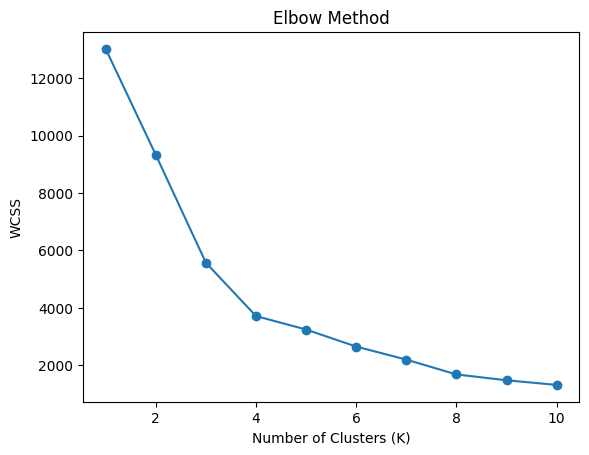

In [18]:
#Elbow Method – Find Best K
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [20]:
#Apply KMeans Clustering

k = 4  # Set based on elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)

rfm['Cluster'] = clusters
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,1.04,1
1,12347.0,2,7,481.21,0
2,12348.0,75,4,178.71,0
3,12349.0,19,1,605.10,0
4,12350.0,310,1,65.30,1


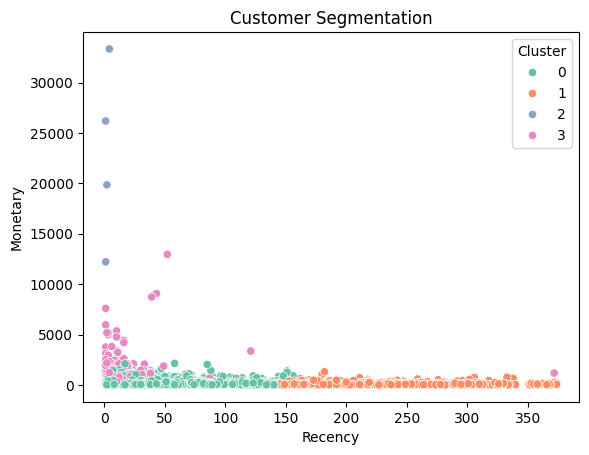

In [21]:
#Visualize Cluster Characteristics

sns.scatterplot(
    x=rfm['Recency'], 
    y=rfm['Monetary'], 
    hue=rfm['Cluster'], 
    palette='Set2'
)
plt.title("Customer Segmentation")
plt.show()


In [24]:
#Cluster Centroid Analysis

cluster_profile = rfm.groupby('Cluster').mean()
cluster_profile

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15286.504712,43.850829,3.743256,239.290251
1,15342.893497,248.925542,1.542884,95.794949
2,14899.000000,2.000000,137.750000,22893.065000
3,15296.882653,12.122449,24.622449,1584.152092


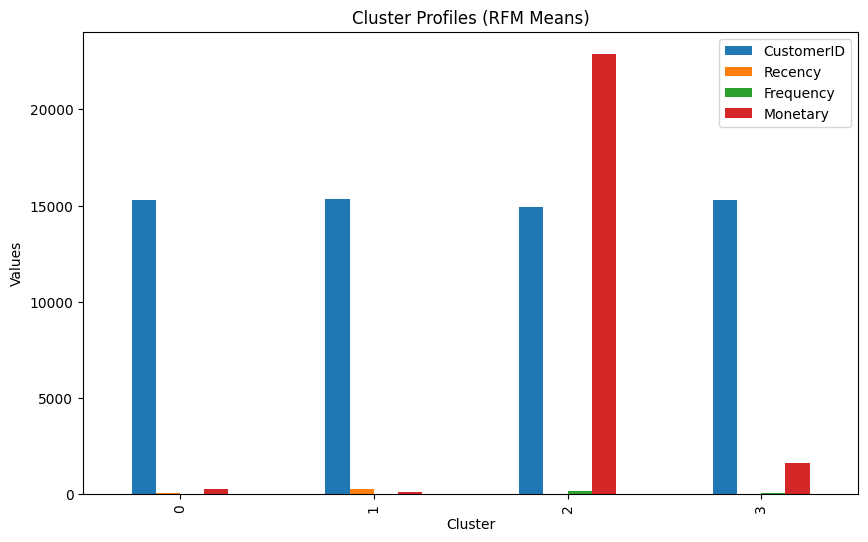

In [25]:
cluster_profile.plot(kind='bar', figsize=(10,6))
plt.title("Cluster Profiles (RFM Means)")
plt.xlabel("Cluster")
plt.ylabel("Values")
plt.show()

In [26]:
#Describe Customer Segments

for c in rfm['Cluster'].unique():
    print(f"\nCluster {c} Summary:")
    print(rfm[rfm['Cluster'] == c].describe())


Cluster 1 Summary:
         CustomerID      Recency    Frequency     Monetary  Cluster
count   1061.000000  1061.000000  1061.000000  1061.000000   1061.0
mean   15342.893497   248.925542     1.542884    95.794949      1.0
std     1720.033616    65.942722     1.063679   113.634746      0.0
min    12346.000000   143.000000     1.000000     0.420000      1.0
25%    13874.000000   191.000000     1.000000    28.350000      1.0
50%    15326.000000   243.000000     1.000000    62.580000      1.0
75%    16781.000000   301.000000     2.000000   115.820000      1.0
max    18281.000000   374.000000    12.000000  1303.950000      1.0

Cluster 0 Summary:
         CustomerID      Recency    Frequency     Monetary  Cluster
count   3077.000000  3077.000000  3077.000000  3077.000000   3077.0
mean   15286.504712    43.850829     3.743256   239.290251      0.0
std     1719.690094    36.335475     2.982566   258.413178      0.0
min    12347.000000     1.000000     1.000000     0.170000      0.0
25%    1